In [1]:
import concurrent
import pickle
import json
import funcy
import csv
import os
import gzip
import pandas as pd
import numpy as np
import imblearn

import sklearn
# from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import make_pipeline

import imblearn
from imblearn.under_sampling import RandomUnderSampler
# #from imblearn.pipeline import make_pipeline as make_pipeline_imb
# from imblearn.metrics import classification_report_imbalanced

import matplotlib.pyplot as plt 

In [2]:

import sklearn
# from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import make_pipeline


from imblearn.under_sampling import RandomUnderSampler
# #from imblearn.pipeline import make_pipeline as make_pipeline_imb
# from imblearn.metrics import classification_report_imbalanced
import pandas_ml as pdml

In [3]:
def load_zipped_pickle(filename):
    # load a zipped compressed pickle file
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object
    
def save_zipped_pickle(obj, filename, protocol=-1):
    # this will default to the highest protocol
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f, protocol)

In [4]:
index_file = '/pool001/lraymond/patent_data/index_files/sample_pat_nums_all_numerical.gzip'

valid_patents2 = load_zipped_pickle(index_file)

In [5]:
valid_patents2[['flag_has_dependent_claim_text',
       'flag_has_description_text', 'flag_has_independent_claim_text',
       'flag_has_references', 'indep_claims_filenames', 'max_dependent_claim',
       'max_independent_claim', 'max_reference_sequence',
       'min_reference_sequence', 'number_dependent_claims_found',
       'number_description_found', 'number_independent_claims_found', 'number_journal_references',
       'number_references_found']].describe()

,flag_has_dependent_claim_text,flag_has_description_text,flag_has_independent_claim_text,flag_has_references,max_dependent_claim,max_independent_claim,max_reference_sequence,min_reference_sequence,number_dependent_claims_found,number_description_found,number_independent_claims_found,number_journal_references,number_references_found
count,188672.0,188672.000000,188672.000000,188672.000000,188672.0,188672.000000,188672.000000,188672.0,188672.0,188672.000000,188672.000000,188672.000000,188672.000000
mean,0.0,0.822804,0.999905,0.275070,0.0,15.024142,1.581666,0.0,0.0,0.833701,15.021916,1.425707,1.856105
std,0.0,0.381836,0.009767,0.446551,0.0,12.052538,8.294750,0.0,0.0,0.400548,12.052292,7.385839,8.439750
min,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,1.000000,0.000000,0.0,7.000000,0.000000,0.0,0.0,1.000000,7.000000,0.000000,0.000000
50%,0.0,1.000000,1.000000,0.000000,0.0,13.000000,0.000000,0.0,0.0,1.000000,12.000000,0.000000,0.000000
75%,0.0,1.000000,1.000000,1.000000,0.0,20.000000,0.000000,0.0,0.0,1.000000,20.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,0.0,298.000000,683.000000,0.0,0.0,2.000000,298.000000,638.000000,684.000000


In [6]:
valid_patents2.loc[pd.isnull(valid_patents2['5_year_cites_rank']), 'patent_number'].dtype

dtype('int64')

In [6]:
NUMERICAL_COLS = [
    'description_word_count',
    'lawyer_total_num_assignees',
 'lawyer_total_num_inventors',
 'lawyer_total_num_patents',
 'max_dependent_claim',
 'max_independent_claim',
 'max_reference_sequence',
 'min_reference_sequence',
'inventor_total_num_patents',               
 'number_assignees',
 'number_assistant_examiners',
 'number_dependent_claims_found',
 'number_description_found',
 'number_examiners',
 'number_forprior',
 'number_govint',
 'number_independent_claims_found',
 'number_inventors',
 'number_journal_references',
 'number_lawyers',
 'number_primary_examiners',
 'number_references_found']


In [7]:
FLAG_COLS = ['assignee_is_company',
             'assignee_is_gov',
       'assignee_is_ind',
             'flag_has_dependent_claim_text',
 'flag_has_description_text',
 'flag_has_forprior',
 'flag_has_independent_claim_text',
 'flag_has_references',
         'missing_citations_made',
 'missing_patent_abstract',
 'missing_patent_title']

In [8]:
CATEGORICAL_VARS = [
#    'lawyer_organization',
     'nber_category_id',
   #  'nber_subcategory_id',
    'patent_firstnamed_assignee_country',
     'patent_firstnamed_assignee_state',
     'patent_firstnamed_inventor_country',
     'patent_firstnamed_inventor_state',
    'patent_year'
]

In [9]:
TARGET = ['10_year_cites', '10_year_cites_top1']

## Start Building Simple Classifier

In [10]:
valid_patents2[
    'patent_firstnamed_assignee_state'] = valid_patents2['patent_firstnamed_assignee_state'].fillna('Missing')
valid_patents2[
    'patent_firstnamed_assignee_country'] = valid_patents2['patent_firstnamed_assignee_country'].fillna('Missing')

valid_patents2[
    'patent_firstnamed_inventor_state'] = valid_patents2['patent_firstnamed_inventor_state'].fillna('Missing')
valid_patents2[
    'patent_firstnamed_inventor_country'] = valid_patents2['patent_firstnamed_inventor_country'].fillna('Missing')


In [11]:
# import pandas_ml as pdml
from sklearn.preprocessing import StandardScaler

In [12]:

def is_valid_patent_number(patent_num):
    '''try to convert patent number to int, flag errors'''
    try:
        t = int(patent_num)
        return 1
    except (TypeError, ValueError):
        return 0

In [13]:
del valid_patents2['is_valid_patent_number']
valid_patents2['is_valid_patent_number'] = valid_patents2.patent_number.apply(is_valid_patent_number)

In [14]:
v2 = valid_patents2.set_index('patent_number')

In [15]:
v3 = v2.loc[v2.is_valid_patent_number==1, NUMERICAL_COLS+FLAG_COLS+TARGET+CATEGORICAL_VARS]

In [17]:
v3.patent_firstnamed_assignee_country.value_counts()

US         145873
Missing     42799
Name: patent_firstnamed_assignee_country, dtype: int64

In [18]:
v3.patent_firstnamed_inventor_country.value_counts()

US    188672
Name: patent_firstnamed_inventor_country, dtype: int64

In [24]:
# for a weird reason, firstnamed assignee/inventor state fields have  'Richmond' and 'San Francisco' instead of 'VA' and 'CA'
# this corrects that
INCORRECT_STATES = {
    'Richmond': 'VA', 
    'San Francisco': 'CA'
}

In [28]:
def correct_data_error(raw_col, dict_corrections):
    if raw_col in dict_corrections:
        return dict_corrections[raw_col]
    print('No issue', raw_col)
    return raw_col

In [29]:
mask = (
            (v3.patent_firstnamed_inventor_state.isin(incorrect_states.keys())) | (
                v3.patent_firstnamed_assignee_state.isin(incorrect_states.keys())))
v3.loc[
    mask, 'patent_firstnamed_inventor_state'] = v3[mask]['patent_firstnamed_inventor_state'].apply(lambda x: correct_data_error(x, INCORRECT_STATES))

No issue CA


In [30]:
v3.loc[
    mask, 'patent_firstnamed_assignee_state'] = v3[mask]['patent_firstnamed_assignee_state'].apply(lambda x: correct_data_error(x, INCORRECT_STATES))

In [45]:
# fill those with nan country or states as missing category
# fill missing with nan
v3.loc[v3.patent_firstnamed_assignee_country=='Missing', 'patent_firstnamed_assignee_country'] = np.nan
v3.loc[v3.patent_firstnamed_assignee_state=='Missing', 'patent_firstnamed_assignee_state'] = np.nan
v3.loc[v3.patent_firstnamed_inventor_state=='Missing', 'patent_firstnamed_inventor_state'] = np.nan
v3.loc[v3.patent_firstnamed_inventor_country=='Missing', 'patent_firstnamed_inventor_country'] = np.nan

In [49]:
# encode cateogoricals, drop one of catories, include a category for missing
# cateogorical cols are auto dropped
v4_cat = pd.get_dummies(v3[CATEGORICAL_VARS], prefix={'nber_category_id':'cat_nber',
   #  'nber_subcategory_id',
    'patent_firstnamed_assignee_country':'cat_a_country',
     'patent_firstnamed_assignee_state':'cat_a_state',
     'patent_firstnamed_inventor_country': 'cat_i_country',
     'patent_firstnamed_inventor_state': 'cat_i_state',
    'patent_year':'cat_grant_year'}, columns=CATEGORICAL_VARS, dummy_na=True, drop_first=False)

In [50]:
# those missing any year are 1985 patents
# try a thermometer encoding with patent year
def thermometer_encode_grant_year(df, columns=None):
    # nte that 1985 is the year implied when all are 0
    if not columns:
         columns=['cat_grant_year_1985.0', 'cat_grant_year_1986.0', 'cat_grant_year_1987.0', 'cat_grant_year_1988.0', 'cat_grant_year_1989.0',
            'cat_grant_year_1990.0', 'cat_grant_year_1991.0', 'cat_grant_year_1992.0', 'cat_grant_year_1994.0',
             'cat_grant_year_1995.0', 'cat_grant_year_1996.0', 'cat_grant_year_1997.0', 'cat_grant_year_1998.0',
            'cat_grant_year_1999.0']
    order = sorted(float(x.split('_')[-1]) for x in columns)
    prefix = '_'.join(columns[0].split('_')[:-1])
    ordered_colnames = ['{pref}_{yr}'.format(pref=prefix, yr=year_val) for year_val in order]
    print(ordered_colnames)
    for ind, colname in enumerate(ordered_colnames):
        print(colname)
        to_update = ordered_colnames[:ind]
        if len(to_update) > 0:
            df.loc[df[colname]==1, to_update] = 1
    return df
    

In [51]:
v5_cat = thermometer_encode_grant_year(v4_cat)

['cat_grant_year_1985.0', 'cat_grant_year_1986.0', 'cat_grant_year_1987.0', 'cat_grant_year_1988.0', 'cat_grant_year_1989.0', 'cat_grant_year_1990.0', 'cat_grant_year_1991.0', 'cat_grant_year_1992.0', 'cat_grant_year_1994.0', 'cat_grant_year_1995.0', 'cat_grant_year_1996.0', 'cat_grant_year_1997.0', 'cat_grant_year_1998.0', 'cat_grant_year_1999.0']
cat_grant_year_1985.0
cat_grant_year_1986.0
cat_grant_year_1987.0
cat_grant_year_1988.0
cat_grant_year_1989.0
cat_grant_year_1990.0
cat_grant_year_1991.0
cat_grant_year_1992.0
cat_grant_year_1994.0
cat_grant_year_1995.0
cat_grant_year_1996.0
cat_grant_year_1997.0
cat_grant_year_1998.0
cat_grant_year_1999.0


In [52]:
stand_scale = StandardScaler()

In [53]:
v5_num = pd.DataFrame(stand_scale.fit_transform(v3[NUMERICAL_COLS]), columns=NUMERICAL_COLS, index=v3.index)

In [54]:
v6 = v5_num.merge(v5_cat, left_index=True, right_index=True, how='inner')

In [55]:
print(v3.shape)
v6.shape

(188672, 41)


(188672, 155)

In [56]:
v7 = v6.merge(v3[FLAG_COLS+TARGET], left_index=True, right_index=True, how='inner')

In [59]:
# add additional output variable margins
descr = v7['10_year_cites'].describe(percentiles=[.25, .5, .75, .85, .9])

print(descr)

# create a couple other classification categories to run the SVM on
v7['10_year_cites_top10'] = (v7['10_year_cites']>= descr['90%']).astype(int)

v7['10_year_cites_top10'].describe()

count    188672.000000
mean         10.280990
std          15.944576
min           0.000000
25%           2.000000
50%           6.000000
75%          12.000000
85%          18.000000
90%          23.000000
max         755.000000
Name: 10_year_cites, dtype: float64


count    188672.000000
mean          0.105177
std           0.306782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: 10_year_cites_top10, dtype: float64

In [60]:
# create a couple other classification categories to run the SVM on
v7['10_year_cites_top50'] = (v7['10_year_cites']>= descr['50%']).astype(int)

v7['10_year_cites_top50'].describe()

v7['10_year_cites_top75'] = (v7['10_year_cites'] >= descr['25%']).astype(int)

# note there are a lot of patents that get 2 so choice of greater than or greater than equal matters alot
v7['10_year_cites_top75'].describe()

v7['10_year_cites_above0'] = (v7['10_year_cites'] > 0).astype(int)

v7['10_year_cites_above0'].describe()

count    188672.000000
mean          0.925898
std           0.261938
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: 10_year_cites_above0, dtype: float64

In [61]:
v7.to_pickle(
    '/pool001/lraymond/processed_data/pre_analysis_dfs/standardized_linear_classifier_df.p')

In [58]:
print(v3.shape)
v7.shape

(188672, 41)


(188672, 168)

In [4]:
v6 = pd.read_pickle(
    '/pool001/lraymond/processed_data/pre_analysis_dfs/standardized_linear_classifier_df.p')

In [5]:
v6['10_year_cites_top1'].describe()

count    188672.000000
mean          0.010213
std           0.100545
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: 10_year_cites_top1, dtype: float64

In [11]:
Y_col = ['10_year_cites_top1']
X_cols = [c for c in v6.columns if '_cites' not in c]

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1, return_indices=True, random_state=0)


X = v6[X_cols].as_matrix()
Y = v6[Y_col[0]].as_matrix()

#X_rus, y_rus, id_rus = rus.fit_sample(X, y)


# (X[ind]==X_resampled).all() should be True
X_resampled, y_resampled, ind = rus.fit_resample(X, Y)

In [12]:
np.mean(y_resampled)

0.5

In [13]:
from sklearn import svm

In [14]:
X_train, X_test, y_train, y_test, pat_nums_train, pat_nums_test = sklearn.model_selection.train_test_split(
    X_resampled, y_resampled, ind, random_state=0, shuffle=True)

clf = svm.SVC(kernel='sigmoid', probability=True)

# Train the classifier with balancing
clf.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = clf.predict(X_test)
y_pred = clf.predict_proba(X_test)
y_pred_probs = y_pred[:,1]

In [15]:
# write function that sorts by predicted probabilities and then graphs
test_target_vals = v6.iloc[pat_nums_test]['10_year_cites']

In [16]:
to_plot = pd.DataFrame(
    index=pat_nums_test, data={
        'actual': y_test,
        'prediction': y_pred_probs,
        '10_year_cites': test_target_vals.values}).sort_values(['prediction', '10_year_cites'])

In [17]:
# group by prediction decile
to_plot['decile'] = pd.qcut(
    to_plot.prediction, q=10, labels=[
        '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], precision=3, duplicates='raise')


In [18]:
to_plot['true_positive'] = 0
mask = ((to_plot.prediction > .5) & (to_plot.actual==1))
to_plot.loc[mask, 'true_positive'] = 1

#to_plot.true_positive.describe()

In [19]:
to_plot['true_negative'] = 0
mask = ((to_plot.prediction <= .5) & (to_plot.actual==0))
to_plot.loc[mask, 'true_negative'] = 1

#to_plot.true_negative.describe()


In [20]:
to_plot['true_negative_class_as_positive'] = 0
mask = ((to_plot.prediction > .5) & (to_plot.actual==0))
to_plot.loc[mask, 'true_negative_class_as_positive'] = 1

#to_plot.true_negative_class_as_positive.describe()

In [21]:
to_plot['true_positive_class_as_negative'] = 0

mask = ((to_plot.prediction <= .5) & (to_plot.actual==1))
to_plot.loc[mask, 'true_positive_class_as_negative'] = 1

#to_plot.true_positive_class_as_negative.describe()

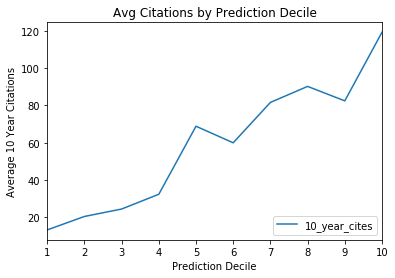

In [22]:
to_plot.groupby('decile').agg({'10_year_cites': np.mean}).plot()
plt.xlabel('Prediction Decile')
plt.ylabel('Average 10 Year Citations')
plt.title('Avg Citations by Prediction Decile')
plt.legend(loc="lower right")
plt.show()

In [23]:
# by cutoff decile of prediction, what is the total percent of top 1 percents found?
percent_explained = to_plot.groupby('decile').agg({'actual': {'top1_count': np.sum, 'total': 'count'}, 
                                                  '10_year_cites': {'avg_cites': np.mean, 'total_cites': np.sum}})

percent_explained.columns = percent_explained.columns.droplevel(0)

/home/software/sloan/local/lib/py36/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [24]:

total_cites = percent_explained['total_cites'].sum()
percent_explained['percentage_cites'] = percent_explained['total_cites']/total_cites
percent_explained['cumsum_percentage_cites'] = percent_explained.sort_index(
    ascending=False)['percentage_cites'].cumsum()



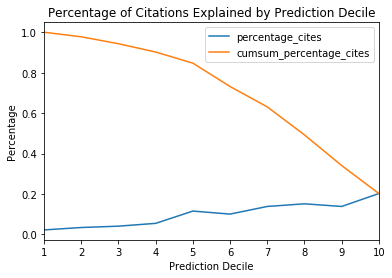

In [25]:
percent_explained[['percentage_cites', 'cumsum_percentage_cites']].plot()
plt.xlabel('Prediction Decile')
plt.ylabel('Percentage')
plt.title('Percentage of Citations Explained by Prediction Decile')
plt.legend(loc="upper right")
plt.show()

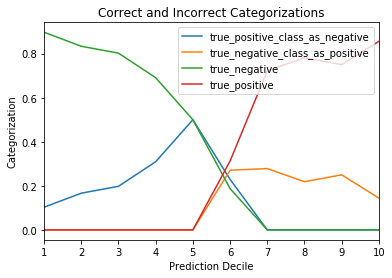

In [26]:
# plot number of correctly classified vs incorrectly classified
to_plot.groupby('decile').agg({'true_positive_class_as_negative': np.mean, 
                              'true_negative_class_as_positive': np.mean,
                              'true_negative': np.mean,
                              'true_positive': np.mean}).plot()
plt.xlabel('Prediction Decile')
plt.ylabel('Categorization')
plt.title('Correct and Incorrect Categorizations')
plt.legend(loc="upper right")
plt.show()

In [27]:
percent_explained['not_top1_count'] = percent_explained['total'] - percent_explained['top1_count']

In [28]:
total_top1 = percent_explained.top1_count.sum()
total_not_top1 = percent_explained.not_top1_count.sum()



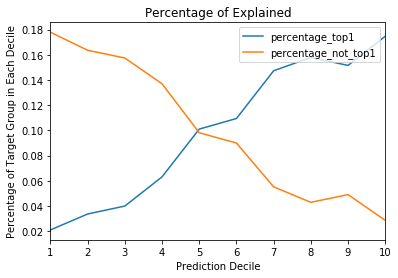

In [29]:
percent_explained['percentage_top1'] = percent_explained['top1_count']/total_top1
percent_explained['percentage_not_top1'] = percent_explained['not_top1_count']/total_not_top1


percent_explained[[
    'percentage_top1', 'percentage_not_top1']].plot()
plt.xlabel('Prediction Decile')
plt.ylabel('Percentage of Target Group in Each Decile')
plt.title('Percentage of Explained')
plt.legend(loc="upper right")
plt.show()


In [30]:
# Percentage of citations explained by real top 1 vs. our top 1
percent_explained['percentage_not_top1_cumsum'] = percent_explained.percentage_not_top1.cumsum()

p2 = percent_explained.sort_index(ascending=False)
p2['percentage_top1_cumsum'] = p2.percentage_top1.cumsum()



In [31]:
p3 = p2.reset_index(drop=False)
p4 = percent_explained.reset_index(drop=True)

In [32]:
p5 = p4[['percentage_not_top1_cumsum']].merge(p3[['percentage_top1_cumsum']], left_index=True, right_index=True)

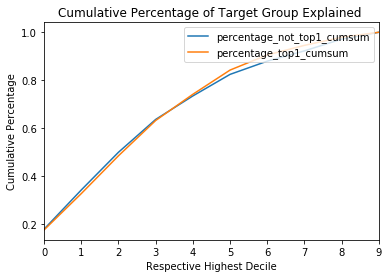

In [33]:
p5.plot()
plt.xlabel('Respective Highest Decile')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Percentage of Target Group Explained ')
plt.legend(loc="upper right")
plt.show()

Sensitivity (also called true positive rate or recall) is the proportion of the positive samples which is well classified while specificity (also called true negative rate) is the proportion of the negative samples which are well classified.

In [34]:
# classifier = svm.SVC(kernel='sigmoid', probability=True,
#                       random_state=RANDOM_STATE)
# classifier.fit(X_train, y_train)
# y_pre_bal = classifier.predict_proba(X_test)
#     # Compute ROC curve and area the curve



print(metrics.classification_report_imbalanced(y_test, y_pred_bal))

print(len(y_pred_bal))

# total correctly classified true positives
sum(map(lambda x: sum(x)==2, zip(y_pred_bal, y_test)))

# total correctly classified true negatives
sum(map(lambda x: sum(x)==0, zip(y_pred_bal, y_test)))

# total true positives classified as negative
sum(map(lambda x: ((x[0]==0) & (x[1]==1)) , zip(y_pred_bal, y_test)))

# total true negatives classified as positive
# first is predicted value, second is correct value
sum(map(lambda x: ((x[0]==1) & (x[1]==0)) , zip(y_pred_bal, y_test)))

print(len(y_train))
print(sum(y_pred_bal))
print(sum(y_train))

NameError: name 'metrics' is not defined

In [47]:
# Run classifier with cross-validation and plot ROC curves
import matplotlib.pyplot as plt

from scipy import interp

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

RANDOM_STATE = 0

#classifier = LogisticRegression(random_state=RANDOM_STATE)
Y_col = ['10_year_cites_top1']
X_cols = [c for c in v6.columns if '_cites' not in c]

rus = RandomUnderSampler(sampling_strategy=1, return_indices=True, random_state=0)


X = v6[X_cols].as_matrix()
Y = v6[Y_col[0]].as_matrix()

#X_rus, y_rus, id_rus = rus.fit_sample(X, y)


# (X[ind]==X_resampled).all() should be True
X_resampled, y_resampled, ind = rus.fit_resample(X, Y)

tprs = []
aucs = []

# remember to specify the type of model

#clf = LogisticRegression()

In [48]:
def gen_folds(clf, X_resampled=X_resampled, y_resampled=y_resampled):
    tprs = []
    aucs = []
    i = 0
    mean_fpr = np.linspace(0, 1, 100)
    cv = StratifiedKFold(n_splits=8)

    for train, test in cv.split(X_resampled, y_resampled):
        probas_ = clf.fit(X_resampled[train], y_resampled[train]).predict_proba(X_resampled[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_resampled[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    return tprs, aucs
  

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
names = ["Logistic Regression", "Linear SVM", "RBF SVM", 
         "Sigmoid SVM", 
          "Random Forest", "Neural Net", "AdaBoost",
         "QDA"]

In [ ]:
classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    SVC(kernel='sigmoid', probability=True),

 #   GaussianProcessClassifier(1.0 * RBF(1.0)),
   # DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis()
]

In [43]:
# plotting logic
def gen_ROC_plot(classifier_name, tprs, aucs):
    mean_fpr = np.linspace(0, 1, 100)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {}'.format(classifier_name))
    plt.legend(loc="lower right")
    plt.savefig('/home/lraymond/plots/{}.png'.format(classifier_name))
    plt.show()

# how to interpret ROC and AUC - write up
# what are balanced/imbalanced metrics
# add in vectorized abstract/title
# test all the linear classifiers
# 
# add in references count and description information

In [ ]:
gen_ROC_plot(names[3], *res[3])

## ROC Interpretation
* for a series of different cut probabilities, it shows the true positive rate and the false positive rate. 
* True Positive/Sensitivity/Recall/Probability of Detection: The fraction of people with the disease that the test correctly identifies as positive. 
* Specificity: 1-False positive rate (prediction a top1 patent that isn't) - The fraction of people without the disease that the test correctly identifies as negative.
* Area under the curve is the accuracy -probability the classifier will rank a randomly chosen positive instance higher than a randomly chosen control


In [49]:
#res = list(map(gen_folds, classifiers))
print(np.mean(y_resampled))

0.5


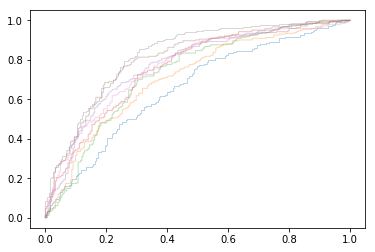

In [50]:
clf = svm.SVC(kernel='sigmoid', probability=True)
svc_res = gen_folds(clf, X_resampled, y_resampled)

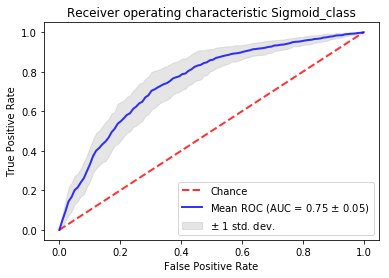

In [51]:
gen_ROC_plot('Sigmoid_class', *svc_res)

In [8]:
Y_col_C = ['10_year_cites_top1']
Y_col_R = ['10_year_cites']


X_cols = [c for c in v6.columns if '_cites' not in c]

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1, return_indices=True, random_state=0)


In [9]:

X = v6[X_cols].as_matrix()
Y_C = v6[Y_col_C[0]].as_matrix()


X_resampled, y_c_resampled, ind = rus.fit_resample(X, Y_C)


In [11]:
X_train, X_test, y_train, y_test, ind_train, ind_test = sklearn.model_selection.train_test_split(
    X_resampled, y_c_resampled, ind , random_state=0, shuffle=True)

In [13]:
# Train the regress0-k with balancing
clf = svm.SVC(kernel='sigmoid', probability=True, max_iter=3000)
clf.fit(X_train, y_train)
#preds = clf.predict_proba(X_resampled[test])
        # Compute ROC curve and area the curve

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=3000, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
q_score = clf.predict_proba(X)

In [16]:
q_score.shape

(188672, 2)

In [17]:
# combine 
scored = v6.merge(
    pd.DataFrame({'q_score': q_score[:, 1]}, index=v6.index), left_index=True, right_index=True)

In [18]:
scored.to_pickle('/pool001/lraymond/processed_data/scored_dfs/scored_SVM.p')

In [66]:
v6[Y_col_R[0]].describe()

count    188672.000000
mean         10.280990
std          15.944576
min           0.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         755.000000
Name: 10_year_cites, dtype: float64

In [76]:
Y_R = v6[Y_col_R[0]].as_matrix()

X_train, X_test, y_train, y_test, ind_train, ind_test = sklearn.model_selection.train_test_split(
    X, Y_R, v6.index.values , random_state=0, shuffle=True)

In [77]:
ss = preprocessing.StandardScaler().fit(y_train.reshape(-1,1))

/home/software/sloan/local/lib/py36/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
y_train2 = ss.transform(y_train.reshape(-1,1))

/home/software/sloan/local/lib/py36/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [79]:
y_test2 = ss.transform(y_test.reshape(-1,1))

/home/software/sloan/local/lib/py36/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [82]:
clf2 = svm.SVR(kernel='poly', tol=1, max_iter=800)
clf2.fit(X_train, np.ravel(y_train2))

/home/software/sloan/local/lib/py36/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=800, shrinking=True, tol=1, verbose=False)

In [51]:
X_train.shape

(141504, 272)

In [57]:
regression_preds = clf2.predict(X_test)

In [59]:
from sklearn import metrics
metrics.explained_variance_score(y_test, regression_preds)

0.01995849976564057

In [60]:
metrics.mean_squared_error(y_test, regression_preds)

4032.2344224049016

In [62]:
regression_df = pd.DataFrame(
    {'actual': y_test, 'predicted': regression_preds}, index=ind_test, )

In [63]:
regression_df

,actual,predicted
4536820,1,71.173187
4636768,1,71.094196
5826797,7,71.964769
4786045,0,71.119442
4948455,1,71.391345
4708930,15,72.550414
5300310,3,71.372053
4815294,2,71.603897
4811175,8,71.523527
4597778,1,71.402780
